# Guided project : Short analyze on the importance of Handwashing discovery

**Dataset : https://github.com/islamtaha/DataCamp/blob/master/Dr.%20Semmelweis%20and%20the%20discovery%20of%20handwashing/datasets/yearly_deaths_by_clinic.csv**

In [54]:
import pandas as pd
import matplotlib as plt
from scipy import stats

##  Yearly insight
**yearly_deaths_by_clinic.csv contains the number of women giving birth and dying as the result of child birth, in the two clinics at the Vienna General Hospital for the years 1841 to 1846**

In [3]:
yearly_df = pd.read_csv('RawData/yearly_deaths_by_clinic.csv')
yearly_df

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


**Adding a column for the proportion of deaths per number of births :** 

In [4]:
yearly_df['death_ratio'] = (yearly_df['deaths']/yearly_df['births'])*100
print('Depending of the years, deaths represented between',
      yearly_df['death_ratio'].min().round(decimals = 2),
      '% and',
      yearly_df['death_ratio'].max().round(decimals = 2),
      '% of the births')

Depending of the years, deaths represented between 2.04 % and 15.76 % of the births


**Observing rows from clinic 1 and 2 independently :**

In [5]:
clinic1 = yearly_df.loc[yearly_df['clinic'] == 'clinic 1']
clinic2 = yearly_df.loc[yearly_df['clinic'] == 'clinic 2']

clinic1

,year,births,deaths,clinic,death_ratio
0,1841,3036,237,clinic 1,7.806324
1,1842,3287,518,clinic 1,15.759051
2,1843,3060,274,clinic 1,8.954248
3,1844,3157,260,clinic 1,8.235667
4,1845,3492,241,clinic 1,6.901489
5,1846,4010,459,clinic 1,11.446384


In [6]:
clinic2
#It seems that clinic 2 has a death ratio far smaller than clinic 1

,year,births,deaths,clinic,death_ratio
6,1841,2442,86,clinic 2,3.521704
7,1842,2659,202,clinic 2,7.596841
8,1843,2739,164,clinic 2,5.987587
9,1844,2956,68,clinic 2,2.300406
10,1845,3241,66,clinic 2,2.036409
11,1846,3754,105,clinic 2,2.797017


**Plotting the proportion of deaths at both Clinic 1 and Clinic 2 :**

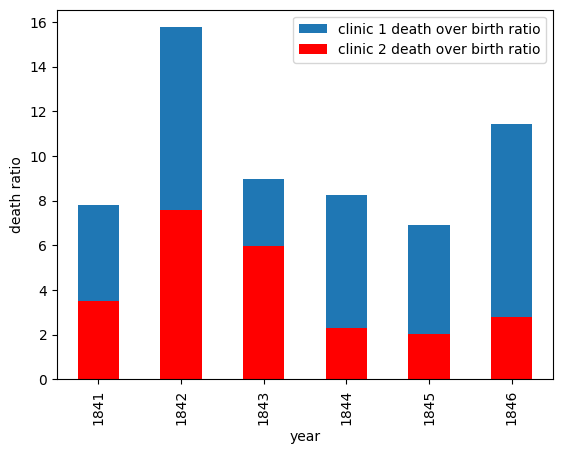

In [7]:
c1_death_ratio_plot = clinic1.plot.bar(
    x='year',
    y='death_ratio',
    label = 'clinic 1 death over birth ratio',
    xlabel = 'years',
    ylabel = 'death ratio')
c2_death_ratio_plot = clinic2.plot.bar(
    x = 'year',
    y= 'death_ratio',
    label = 'clinic 2 death over birth ratio',
    color = 'red',
    ax = c1_death_ratio_plot)

## Monthly insight

In [8]:
monthly_df = pd.read_csv('RawData/monthly_deaths.csv', parse_dates = ['date'])
monthly_df.dtypes

date      datetime64[ns]
births             int64
deaths             int64
dtype: object

In [9]:
monthly_df['death_ratio'] = (monthly_df['deaths']/monthly_df['births'])*100

In [10]:
monthly_df.head()

,date,births,deaths,death_ratio
0,1841-01-01,254,37,14.566929
1,1841-02-01,239,18,7.531381
2,1841-03-01,277,12,4.332130
3,1841-04-01,255,4,1.568627
4,1841-05-01,255,2,0.784314


<Axes: xlabel='dates', ylabel='death ratio'>

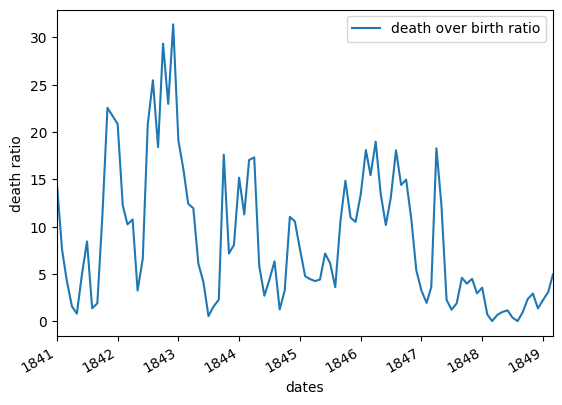

In [11]:
monthly_df.plot(
    x = 'date',
    y = 'death_ratio',
    xlim=(monthly_df['date'].min(), monthly_df['date'].max()),
    label = 'death over birth ratio',
    xlabel = 'dates',
    ylabel = 'death ratio')

## Analyzing effect of handwashing by comparing before and after it started (1847-06-01)


In [12]:
handwashing_start = pd.to_datetime('1847-06-01')

In [20]:
df_before_washing = monthly_df[monthly_df.date < '1847-06-01']
df_after_washing = monthly_df[monthly_df.date >= '1847-06-01']

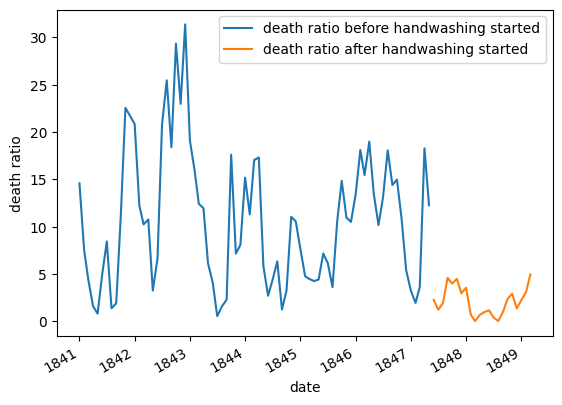

In [47]:
df_before_washing_plot = df_before_washing.plot(
    x = 'date',
    y = 'death_ratio',
    xlabel = 'date',
    ylabel = 'death ratio',
    label = "death ratio before handwashing started")
df_after_washing_plot = df_after_washing.plot(
    x = 'date',
    y = 'death_ratio',
    ax= df_before_washing_plot,
    label = "death ratio after handwashing started")

In [50]:
death_proportion_before = df_before_washing['death_ratio'].mean()
death_proportion_after = df_after_washing['death_ratio'].mean()
mean_diff = death_proportion_after - death_proportion_before
mean_diff

-8.395660751183334

**The ratio of deaths over births was lowered by 8.39% thanks to handwashing on this given period.**